In [2]:
from __future__ import division, print_function, absolute_import
import os
import time
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from config import pathDict
from conv_net.train import Train, TrainConvEnc
from conv_net.test import Test
from data_transformation.data_prep import get_valid_land_house_ids, dumpStratifiedBatches_balanced_class
from plot import Plot

%matplotlib inline
sns.set_style("whitegrid")


imp_image_shape = [224,400,3]
crop_shape = [128,128,3]
output_img_shape = [64,64,3]

which_net = 'autoencoder'
batch_prepare = True
train = True
test = True

Input your image type OPTIONS: (assessor, assessor_code, google_aerial, google_overlayed 
 IMAGE_TYPE = assessor_code


# PREPARE BATCHES
------

In [2]:
start_time = time.time()
assessor_code_house_path = pathDict['assessor_code_house_path']
assessor_code_land_path = pathDict['assessor_code_land_path']

cmn_house_pins = [pin.split('.')[0] for pin in os.listdir(assessor_code_house_path) if pin != '.DS_Store']

cmn_land_pins = [pin.split('.')[0] for pin in os.listdir(assessor_code_land_path) if pin != '.DS_Store']

if batch_prepare:
    tr_batch_size = 128
    ts_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    cv_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    dumpStratifiedBatches_balanced_class(cmn_land_pins=cmn_land_pins, 
                                         cmn_house_pins=cmn_house_pins, 
                                         img_resize_shape=[224, 400, 3],
                                         image_type='assessor_code',
                                         ts_batch_size=ts_batch_size,
                                         cv_batch_size=cv_batch_size,
                                         tr_batch_size=tr_batch_size,
                                         shuffle_seed=873,
                                         get_stats=True,
                                         max_batches=None)
print ('--------------- %s seconds ------------------'%(time.time() - start_time))

--------------- 17.7808620929718 seconds ------------------


# EVALUATE MODELS:
----------

## AUTOENCODER : 
* img_shape  = [64x64x3]
* conv_filter = [3,16,32,64,128]
* dconv_filter = [128,64,32,16,3]

Dumping Checkpoints to %s C:\Users\newline\Documents\ImageClassification\data\data_models\assessor_code_images\checkpoint\autoencoder
Dumping Tensorboard Summary to %s C:\Users\newline\Documents\ImageClassification\data\data_models\assessor_code_images\summary\autoencoder
(?, 4, 4, 256)
Learning Rate: Initial:  0.01
Checkpoint latest at:  C:\Users\newline\Documents\ImageClassification\data\data_models\assessor_code_images\checkpoint\autoencoder\autoencoder_epoch_12_batch_2
cvalid_shape:  (60, 224, 400, 3)


C:\Anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


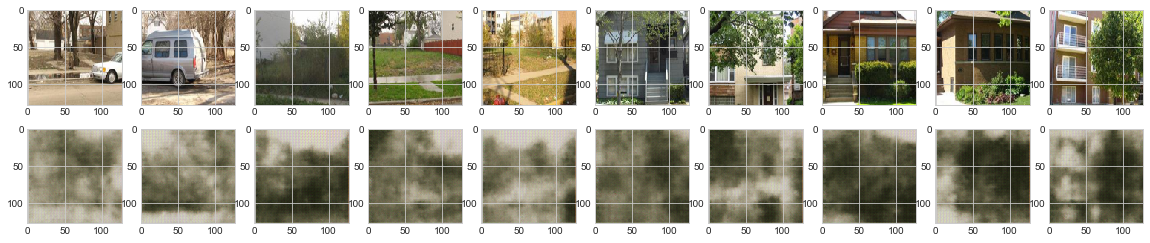

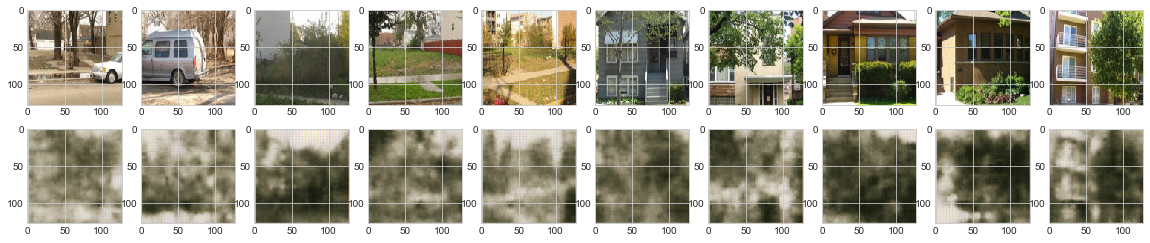

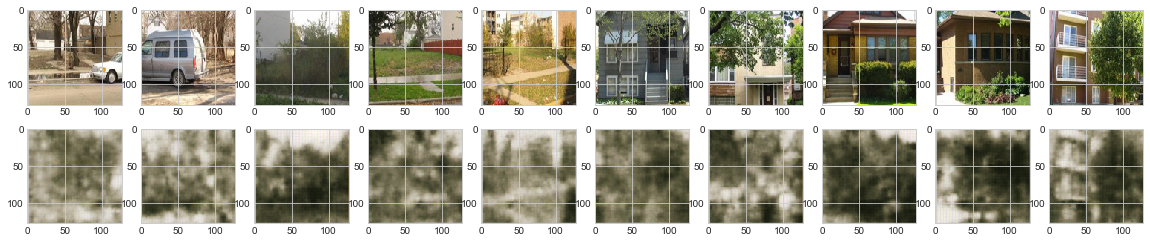

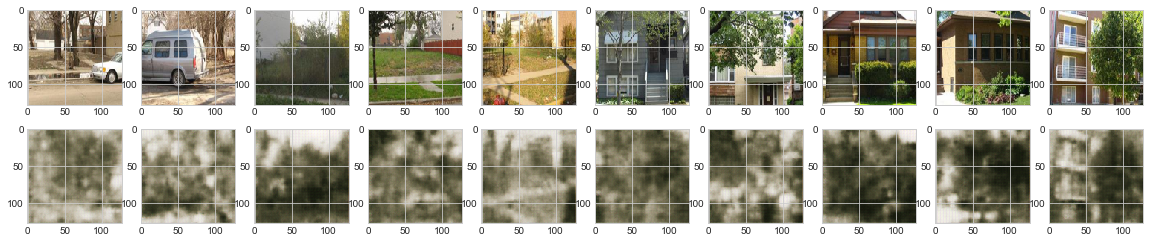

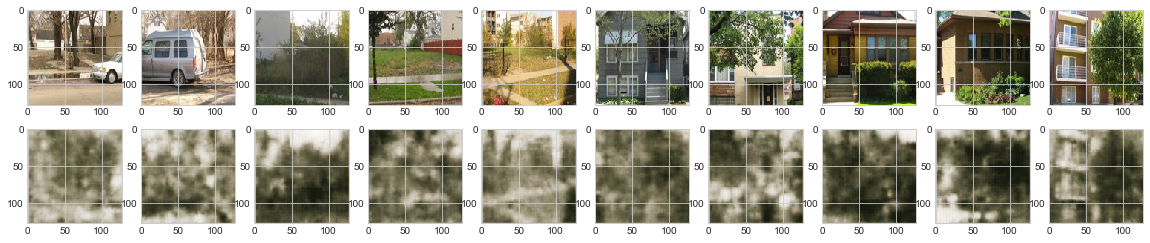

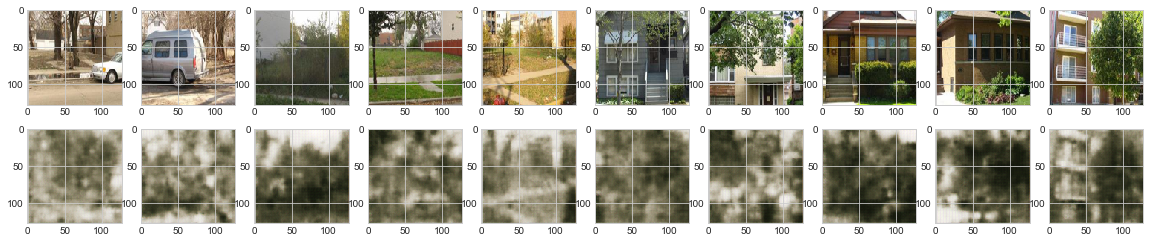

In [3]:
max_batches = 2

if train:
    tr_obj = TrainConvEnc(dict(inp_img_shape=[224, 400, 3],
                            crop_shape=[128, 128, 3],
                            out_img_shape=[128, 128, 3],
                            use_checkpoint=True,
                            save_checkpoint=True,
                            write_tensorboard_summary=False
                            ),
                       device_type='gpu',
                       which_net='autoencoder',  # vgg
                       image_type='assessor_code')
    (tr_loss_arr, cv_loss_arr, l_rate_arr, cv_reconstruction_mse,
     cv_reconstruction_entropy, cvY_label) = tr_obj.run(num_epochs=500, num_batches=max_batches+1, get_stats_at=100,
                                                        plot=True)  # + 1)
    
    reconsMSE_DF = pd.DataFrame({'labels':cvY_label, 'reconstruction_mse': cv_reconstruction_mse})
    reconsENT_DF = pd.DataFrame({'labels':cvY_label, 'reconstruction_ent': cv_reconstruction_entropy})

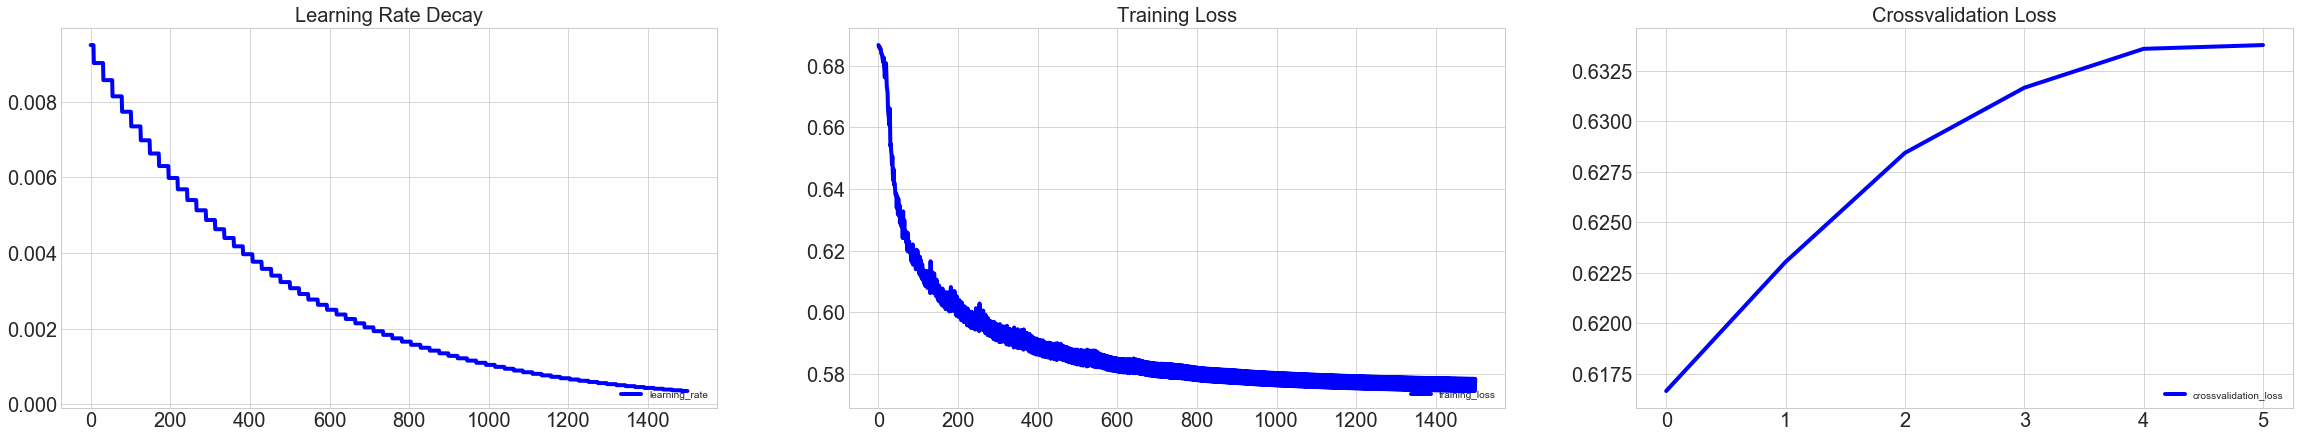

In [4]:
oj = Plot(rows=1, columns=3, fig_size=(40,7))

l_rate_df = pd.DataFrame(l_rate_arr, columns=['learning_rate'])
oj.vizualize(data=l_rate_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Learning Rate Decay'})

tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot import Plot
sns.set_style("whitegrid")

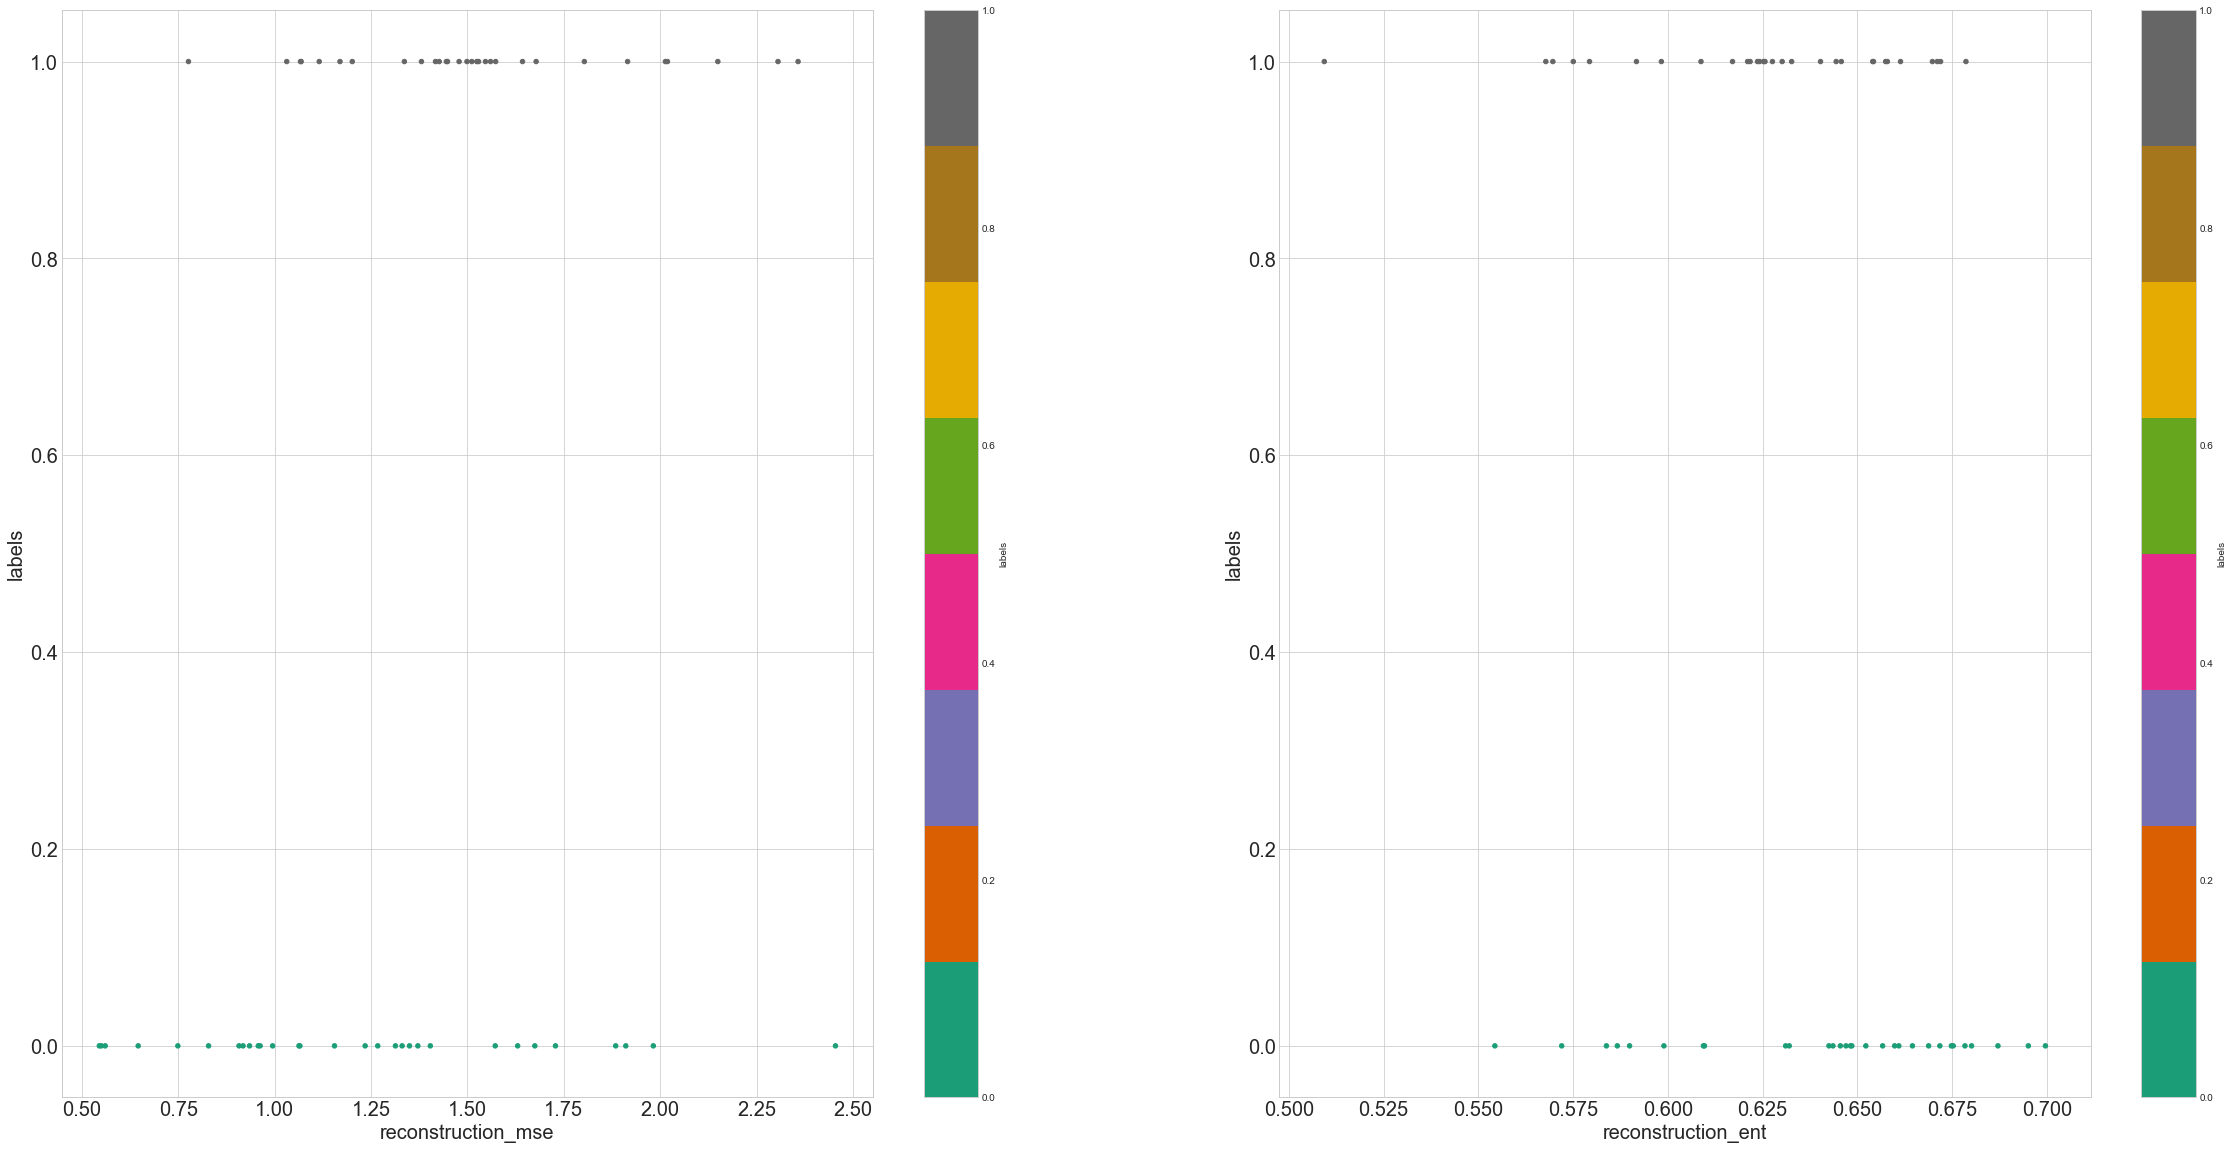

In [7]:
obj_plt = Plot(1,2,(40,20))
obj_plt.vizualize(reconsMSE_DF, colX='reconstruction_mse', colY='labels', label_col='labels', viz_type='scatter')
obj_plt.vizualize(reconsENT_DF, colX='reconstruction_ent', colY='labels', label_col='labels', viz_type='scatter')
# reconsMSE_DF.plot.scatter(x='labels', y='reconstruction_mse', c='labels', colormap='Dark2', ax=axs)

In [6]:
assessor_code_house_path = pathDict['assessor_code_house_path']
assessor_code_land_path = pathDict['assessor_code_land_path']

print ([pins for pins in os.listdir(assessor_code_house_path) if pins!='.DS_Store'])

['20-30-208-031-0000.jpg', '20-35-115-022-1009.jpg', '21-30-103-003-1018.jpg', '21-32-209-045-0000.jpg', '20-30-104-004-0000.jpg', '20-29-201-004-0000.jpg', '20-25-404-018-0000.jpg', '20-29-202-034-0000.jpg', '13-14-115-021-0000.jpg', '20-28-214-015-0000.jpg', '20-28-310-007-0000.jpg', '11-31-302-087-1004.jpg', '20-32-420-022-0000.jpg', '13-03-214-016-0000.jpg', '20-27-223-020-0000.jpg', '20-35-300-034-0000.jpg', '21-30-322-024-0000.jpg', '20-27-113-013-0000.jpg', '21-31-307-029-0000.jpg', '20-26-312-050-0000.jpg', '20-28-101-005-0000.jpg', '10-36-419-033-0000.jpg', '20-27-320-033-0000.jpg', '20-27-413-015-0000.jpg', '20-30-205-003-0000.jpg', '10-32-102-063-0000.jpg', '11-31-401-027-0000.jpg', '20-27-409-001-0000.jpg', '11-32-115-026-1001.jpg', '21-31-202-012-0000.jpg', '21-32-202-017-0000.jpg', '20-33-110-017-0000.jpg', '20-25-427-013-0000.jpg', '20-29-122-020-0000.jpg', '20-32-411-016-0000.jpg', '20-35-204-019-0000.jpg', '20-33-219-005-0000.jpg', '13-10-314-050-0000.jpg', '13-08-415-

In [7]:
print ([pins for pins in os.listdir(assessor_code_land_path) if pins!='.DS_Store'])

['16-22-406-028-0000.jpg', '13-33-416-020-0000.jpg', '25-24-425-032-0000.jpg', '20-17-110-025-0000.jpg', '20-17-110-024-0000.jpg', '20-18-228-014-0000.jpg', '21-31-311-026-0000.jpg', '20-21-209-021-0000.jpg', '16-15-405-039-0000.jpg', '20-20-108-040-0000.jpg', '20-17-219-041-0000.jpg', '20-21-314-016-0000.jpg', '20-17-223-026-0000.jpg', '20-19-128-014-0000.jpg', '16-15-410-007-0000.jpg', '20-17-210-043-0000.jpg', '20-20-330-032-0000.jpg', '20-17-211-022-0000.jpg', '20-20-330-033-0000.jpg', '20-19-428-013-0000.jpg', '20-17-308-025-0000.jpg', '13-33-406-007-0000.jpg', '20-18-226-017-0000.jpg', '25-25-211-018-0000.jpg', '20-17-119-027-0000.jpg', '16-10-411-022-0000.jpg', '20-21-321-012-0000.jpg', '16-10-411-023-0000.jpg', '20-17-312-031-0000.jpg', '26-31-101-011-0000.jpg', '16-22-405-027-0000.jpg', '16-22-405-026-0000.jpg', '16-09-223-006-0000.jpg', '20-21-302-027-0000.jpg', '20-17-213-005-0000.jpg', '20-17-127-006-0000.jpg', '20-20-317-036-0000.jpg', '20-21-324-035-0000.jpg', '20-17-213-